Fraud Detection

Tasks

-Explore the dataset /Visualize -Decide which features are important -perform Machine Learning -Test the model on the testing set


In [5]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [7]:
df = pd.read_csv("creditcard.csv", low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,36391.0,0.520811,-0.847479,-0.411942,1.353502,-0.342878,-0.425195,0.701513,-0.158918,-0.342278,...,0.212316,-0.262988,-0.457991,-0.007754,0.569639,-0.375265,-0.077567,0.065437,372.00,0
1,82969.0,1.297913,-0.448727,0.366546,0.119067,-0.757085,-0.257146,-0.397795,-0.061827,-0.675874,...,-0.487918,-0.713861,0.046184,0.088625,0.401380,0.398008,0.011392,0.010863,14.00,0
2,126899.0,-0.153769,1.058689,1.613582,2.780483,0.707905,0.800761,0.264176,0.256025,-1.116186,...,0.255425,0.754046,-0.068850,0.655667,-0.415938,-0.073697,0.102771,0.095577,6.05,0
3,107839.0,-0.275405,0.574961,1.796198,0.108893,0.409876,-0.416300,0.543396,-0.623720,1.983400,...,-0.220313,0.045566,0.024342,-0.098650,-0.945638,-0.945893,-0.352832,-0.190919,2.12,0
4,53454.0,-0.489692,1.282983,0.970156,1.068707,-0.353179,-0.750217,0.326939,0.068507,-0.562172,...,-0.244264,-0.550655,0.036706,0.367348,-0.357935,0.283383,-0.129928,-0.210840,20.42,0


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.152597e-15,3.486638e-16,-1.417498e-15,2.064366e-15,9.772553e-16,1.467059e-15,-5.623711e-16,1.248531e-16,-2.399845e-15,...,1.644641e-16,-3.371791e-16,2.576315e-16,4.485030e-15,5.202105e-16,1.676723e-15,-3.662910e-16,-1.255021e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
fraud = df.loc[df['Class']==1]
non_frauds = df.loc[df['Class']== 0]
print(len(fraud))
print(len(non_frauds))

492
284315


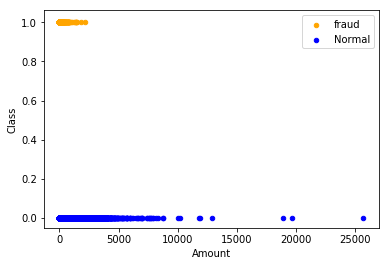

In [9]:
ax = fraud.plot.scatter(x='Amount',y='Class',color='Orange', label='fraud')
non_frauds.plot.scatter(x='Amount',y='Class', color='Blue', label='Normal',ax = ax)
plt.show()

Time for ML

In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [22]:
x = df.iloc[:, :-1]
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

In [24]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(x_train, y_train)
print('Score:', logistic.score(x_test, y_test))


Score: 0.9989366291142923


In [25]:
y_predicted = np.array(logistic.predict(x_test))
print(y_predicted)

[0 0 0 ... 0 0 0]
